In [1]:
import pandas as pd
df= pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')

C:\Users\hnwong\Anaconda3\envs\env_py37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [3]:
new = df['Race and ethnicity (combined)'].str.split(",",n=1,expand=True)

In [4]:
df['Race']=new[0]
df['Ethnicity']=new[1]

In [5]:
df.drop(columns='Race and ethnicity (combined)',inplace=True)

In [6]:
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black,Non-Hispanic
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black,Non-Hispanic
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black,Non-Hispanic
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black,Non-Hispanic
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black,Non-Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown,None
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None


In [7]:
df.shape

(8405079, 12)

In [8]:
df.isnull().sum()

cdc_report_dt           0
pos_spec_dt       5534290
onset_dt          4009122
current_status          0
sex                    18
age_group              89
hosp_yn                 0
icu_yn                  0
death_yn                0
medcond_yn              0
Race                    7
Ethnicity         4578441
dtype: int64

In [9]:
df=df.drop(['pos_spec_dt','onset_dt','Ethnicity'],axis=1)

In [10]:
df=df.dropna()

In [11]:
df

,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown
8405075,2020/10/25,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405076,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405077,2020/11/19,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown


In [12]:
df.shape

(8404990, 9)

In [13]:
df.groupby(['age_group']).count()

,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,Race
age_group,,,,,,,,
0 - 9 Years,299040,299040,299040,299040,299040,299040,299040,299040
10 - 19 Years,841450,841450,841450,841450,841450,841450,841450,841450
20 - 29 Years,1635264,1635264,1635264,1635264,1635264,1635264,1635264,1635264
30 - 39 Years,1372623,1372623,1372623,1372623,1372623,1372623,1372623,1372623
40 - 49 Years,1267350,1267350,1267350,1267350,1267350,1267350,1267350,1267350
50 - 59 Years,1227493,1227493,1227493,1227493,1227493,1227493,1227493,1227493
60 - 69 Years,863260,863260,863260,863260,863260,863260,863260,863260
70 - 79 Years,483689,483689,483689,483689,483689,483689,483689,483689
80+ Years,382869,382869,382869,382869,382869,382869,382869,382869


In [14]:
df.describe().T

,count,unique,top,freq
cdc_report_dt,8404990,321,2020/06/24,155856
current_status,8404990,2,Laboratory-confirmed case,7910037
sex,8404990,5,Female,4340898
age_group,8404990,10,20 - 29 Years,1635264
hosp_yn,8404990,4,No,3502508
icu_yn,8404990,4,Missing,6178240
death_yn,8404990,4,No,3690765
medcond_yn,8404990,4,Missing,6063360
Race,8404990,9,Unknown,2781165


<AxesSubplot:ylabel='medcond_yn'>

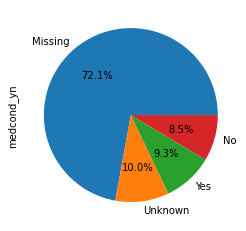

In [15]:
df['medcond_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='death_yn'>

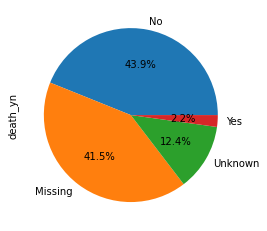

In [16]:
df['death_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='hosp_yn'>

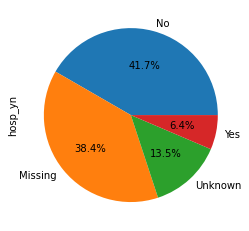

In [17]:
df['hosp_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='icu_yn'>

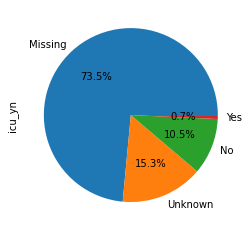

In [18]:
df['icu_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='current_status'>

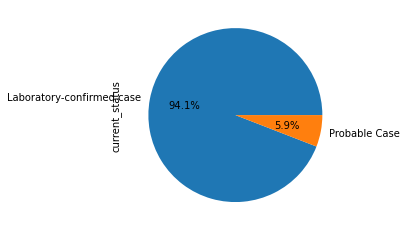

In [19]:
df['current_status'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Race'>

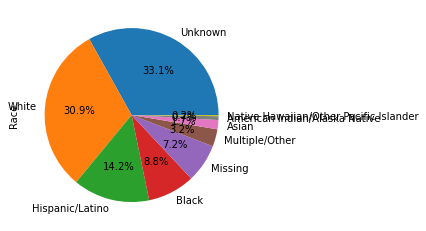

In [20]:
df['Race'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='count', ylabel='current_status'>

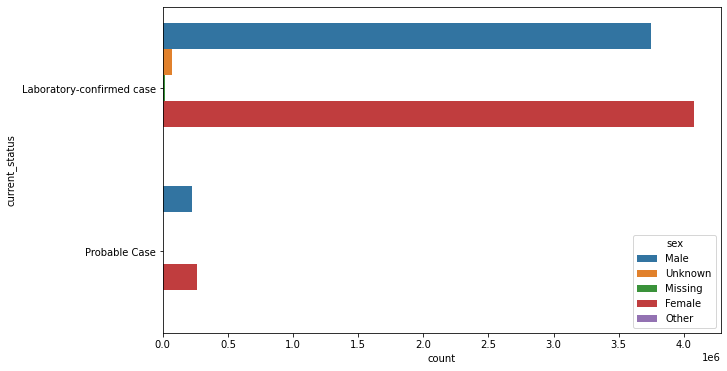

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(y="current_status",hue ='sex',data=df)

<AxesSubplot:xlabel='count', ylabel='medcond_yn'>

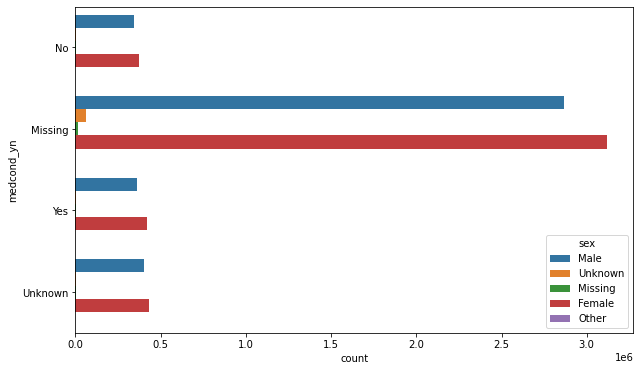

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y="medcond_yn",hue ='sex',data=df)

<AxesSubplot:xlabel='count', ylabel='death_yn'>

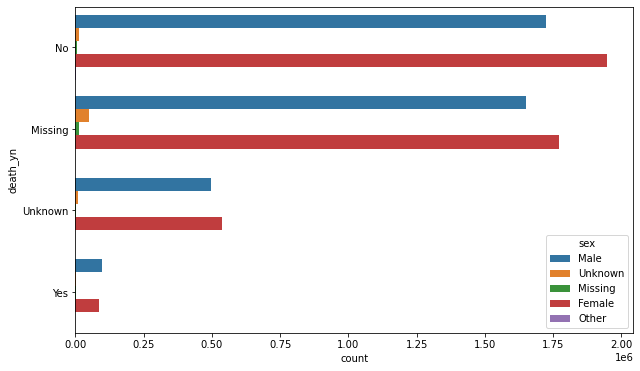

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y="death_yn",hue ='sex',data=df)

<AxesSubplot:xlabel='count', ylabel='age_group'>

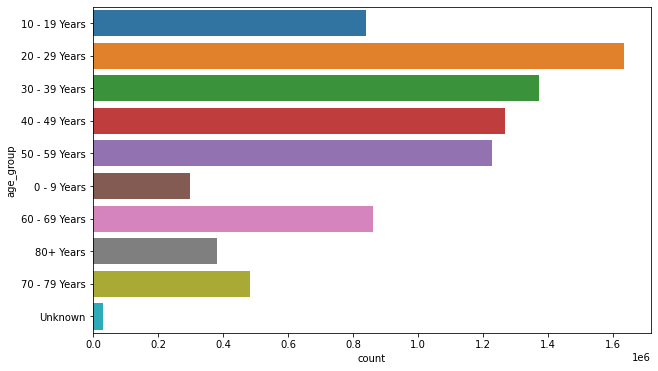

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y="age_group",data=df)

<AxesSubplot:xlabel='count', ylabel='age_group'>

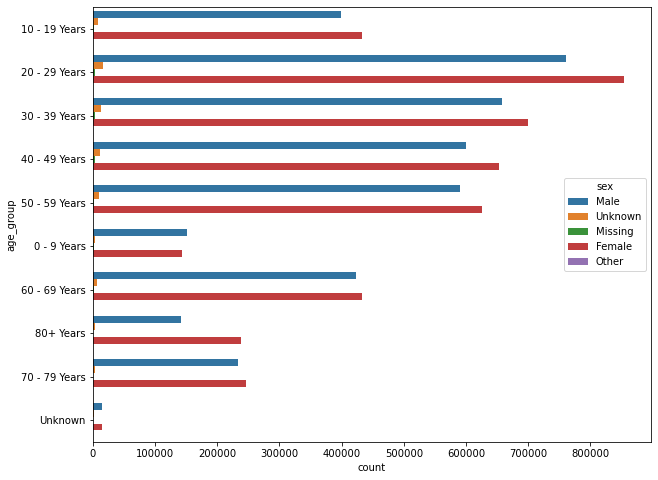

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(y="age_group",hue ='sex',data=df)

In [26]:
df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

## Data Preparation

In [27]:
data=df.copy()

In [28]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404990 entries, 0 to 8405078
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   cdc_report_dt   object
 1   current_status  object
 2   sex             object
 3   age_group       object
 4   hosp_yn         object
 5   icu_yn          object
 6   death_yn        object
 7   medcond_yn      object
 8   Race            object
dtypes: object(9)
memory usage: 641.2+ MB


In [30]:
data.drop(['cdc_report_dt'],axis=1,inplace=True)

In [31]:
data

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black
1,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
3,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black
4,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown


In [32]:
y=data['death_yn']

In [37]:
X=data.drop(['death_yn'],axis=1)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [41]:
# Encode Label
encoder=LabelEncoder()
encoded_y=encoder.fit_transform(y)

In [42]:
X['current_status']=encoder.fit_transform(X['current_status'])
X['sex']=encoder.fit_transform(X['sex'])
X['age_group']=encoder.fit_transform(X['age_group'])
X['hosp_yn']=encoder.fit_transform(X['hosp_yn'])
X['icu_yn']=encoder.fit_transform(X['icu_yn'])
X['medcond_yn']=encoder.fit_transform(X['medcond_yn'])
X['Race']=encoder.fit_transform(X['Race'])

In [45]:
# Standardizing
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [47]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,encoded_y,test_size=0.2)

In [52]:
# Create Model
model=Sequential()

# Input layer Layer
model.add(Dense(32,activation='relu',input_dim=7))

# Hidden Layer
model.add(Dense(16,activation='relu'))

# Outout Layer
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
# Fit model
model.fit(X_train,y_train,batch_size=5,epochs=20)

Epoch 1/20
6723992/6723992 [==============================] - 1038s 154us/step - loss: -2871220499563.5801 - accuracy: 0.7014
Epoch 2/20
6723992/6723992 [==============================] - 1028s 153us/step - loss: -4978653467398.1641 - accuracy: 0.7042
Epoch 3/20
6723992/6723992 [==============================] - 1040s 155us/step - loss: -7967322732387.4062 - accuracy: 0.7043
Epoch 4/20
6723992/6723992 [==============================] - 1007s 150us/step - loss: -11999175389297.8516 - accuracy: 0.7042
Epoch 5/20
6723992/6723992 [==============================] - 976s 145us/step - loss: -17200865553746.0410 - accuracy: 0.7041
Epoch 6/20
6723992/6723992 [==============================] - 973s 145us/step - loss: -23735810327325.1797 - accuracy: 0.7041
Epoch 7/20
6723992/6723992 [==============================] - 972s 145us/step - loss: -31751982693266.6328 - accuracy: 0.7040
Epoch 8/20
6723992/6723992 [==============================] - 974s 145us/step - loss: -41375240666111.2109 - accuracy

### Remove noise 

In [59]:
data

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black
1,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
3,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black
4,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown


In [61]:
data.groupby('sex').count()

,current_status,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
sex,,,,,,,
Female,4340898,4340898,4340898,4340898,4340898,4340898,4340898
Male,3970591,3970591,3970591,3970591,3970591,3970591,3970591
Missing,19508,19508,19508,19508,19508,19508,19508
Other,155,155,155,155,155,155,155
Unknown,73838,73838,73838,73838,73838,73838,73838


In [101]:
x=data

In [102]:
x

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black
1,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
3,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black
4,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown


In [103]:
import numpy as np
x=x.replace(to_replace ="Missing", value =np.nan) 

In [104]:
x=x.replace(to_replace ="Unknown", value =np.nan) 

In [105]:
x=x.dropna()

In [106]:
x

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
1,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
4,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
11,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
14,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...
8404296,Laboratory-confirmed case,Female,30 - 39 Years,No,No,No,No,Hispanic/Latino
8404365,Laboratory-confirmed case,Female,30 - 39 Years,No,No,No,Yes,Hispanic/Latino
8404392,Laboratory-confirmed case,Female,30 - 39 Years,No,No,No,Yes,Hispanic/Latino
8404461,Probable Case,Female,30 - 39 Years,No,No,No,No,Hispanic/Latino


In [107]:
tg=x['death_yn']

In [109]:
x=x.drop('death_yn',axis=1)

In [112]:
# Encode Label
encoder=LabelEncoder()
encoded_tg=encoder.fit_transform(tg)

In [113]:
x['current_status']=encoder.fit_transform(x['current_status'])
x['sex']=encoder.fit_transform(x['sex'])
x['age_group']=encoder.fit_transform(x['age_group'])
x['hosp_yn']=encoder.fit_transform(x['hosp_yn'])
x['icu_yn']=encoder.fit_transform(x['icu_yn'])
x['medcond_yn']=encoder.fit_transform(x['medcond_yn'])
x['Race']=encoder.fit_transform(x['Race'])

In [115]:
# Standardizing
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [116]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,encoded_tg,test_size=0.2)

In [117]:
# Create Model
model_2=Sequential()

# Input layer Layer
model_2.add(Dense(128,activation='relu',input_dim=7))

# Hidden Layer
model_2.add(Dense(64,activation='relu'))

# Hidden Layer
model_2.add(Dense(32,activation='relu'))

# Hidden Layer
model_2.add(Dense(16,activation='relu'))

# Hidden Layer
model_2.add(Dense(8,activation='relu'))

# Outout Layer
model_2.add(Dense(1,activation='sigmoid'))

model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [119]:
# Fit model
model_2.fit(X_train,y_train,batch_size=10,epochs=5)

Epoch 1/5
366223/366223 [==============================] - 36s 99us/step - loss: 0.1139 - accuracy: 0.9496
Epoch 2/5
366223/366223 [==============================] - 36s 98us/step - loss: 0.1128 - accuracy: 0.9502
Epoch 3/5
366223/366223 [==============================] - 36s 98us/step - loss: 0.1123 - accuracy: 0.9502
Epoch 4/5
366223/366223 [==============================] - 36s 98us/step - loss: 0.1123 - accuracy: 0.9503
Epoch 5/5
366223/366223 [==============================] - 36s 99us/step - loss: 0.1123 - accuracy: 0.9503


In [120]:
eval_model=model.evaluate(X_train,y_train)

366223/366223 [==============================] - 4s 11us/step


In [121]:
eval_model

[1531727386351927.5, 0.06373712420463562]

## Pycaret

In [127]:
data=data.replace(to_replace ="Missing", value =np.nan)
data=data.replace(to_replace ="Unknown", value =np.nan)
data=data.dropna()
data

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
1,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
4,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
11,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
14,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...
8404296,Laboratory-confirmed case,Female,30 - 39 Years,No,No,No,No,Hispanic/Latino
8404365,Laboratory-confirmed case,Female,30 - 39 Years,No,No,No,Yes,Hispanic/Latino
8404392,Laboratory-confirmed case,Female,30 - 39 Years,No,No,No,Yes,Hispanic/Latino
8404461,Probable Case,Female,30 - 39 Years,No,No,No,No,Hispanic/Latino


In [129]:
from pycaret.classification import *
classification=setup(data=data,target='death_yn',train_size=0.8)

,Description,Value
0,session_id,6115
1,Target,death_yn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(457779, 8)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [130]:
compare=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9504,0.9617,0.5129,0.6353,0.5670,0.5411,0.5448,1.5430
catboost,CatBoost Classifier,0.9504,0.9613,0.5215,0.6321,0.5713,0.5453,0.5482,47.6500
dt,Decision Tree Classifier,0.9503,0.9581,0.5190,0.6326,0.5701,0.5440,0.5471,3.0820
rf,Random Forest Classifier,0.9503,0.9592,0.5218,0.6318,0.5714,0.5453,0.5482,9.1850
gbc,Gradient Boosting Classifier,0.9503,0.9615,0.4871,0.6437,0.5537,0.5280,0.5341,11.5430
et,Extra Trees Classifier,0.9503,0.9583,0.5189,0.6326,0.5700,0.5439,0.5470,10.1790
xgboost,Extreme Gradient Boosting,0.9503,0.9616,0.5135,0.6345,0.5672,0.5412,0.5448,10.0760
lr,Logistic Regression,0.9498,0.9609,0.4950,0.6338,0.5558,0.5296,0.5342,7.6760
ridge,Ridge Classifier,0.9497,0.0000,0.4092,0.6693,0.5076,0.4827,0.4991,0.1890
ada,Ada Boost Classifier,0.9496,0.9606,0.4959,0.6314,0.5554,0.5292,0.5335,3.0320
